Accuracy: 1.0

Confusion Matrix:
 [[79  0]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        71

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



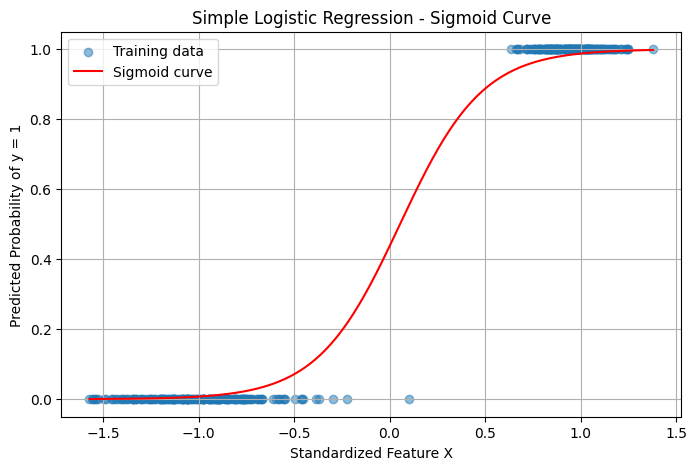

Intercept (β0): [-0.2534356]
Coefficient (β1): [[4.62744904]]


In [1]:
# Import essential libraries
import numpy as np                      # For numerical operations and array handling
import matplotlib.pyplot as plt         # For plotting data and model results
from sklearn.datasets import make_classification  # To generate a synthetic binary classification dataset
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Evaluation metrics
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To normalize (standardize) feature values

# -------------------------------
# 1. Create a simple classification dataset
# -------------------------------
X, y = make_classification(
    n_samples=500,          # Total of 500 samples
    n_features=1,           # Only ONE feature to make it "simple" logistic regression
    n_informative=1,        # That one feature is informative (affects the target)
    n_redundant=0,          # No redundant features
    n_clusters_per_class=1, # Each class has a single cluster
    random_state=42         # Ensures reproducibility of results
)

# At this point:
# - X is a 500x1 numpy array (features)
# - y is a 500-length array (binary target: 0 or 1)

# -------------------------------
# 2. Split the data into train and test sets
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# 70% data used for training, 30% for testing

# -------------------------------
# 3. Standardize the feature values
# -------------------------------
scaler = StandardScaler()                # Create a scaler object to normalize features
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler to training data and transform it
X_test_scaled = scaler.transform(X_test)        # Use the same scaler to transform test data

# WHY standardization? 
# Logistic regression is sensitive to scale of features — standardizing makes optimization more stable

# -------------------------------
# 4. Create and train logistic regression model
# -------------------------------
logreg = LogisticRegression()            # Create logistic regression model object
logreg.fit(X_train_scaled, y_train)      # Train the model on the scaled training data

# THEORY: What's happening internally?
# Logistic regression models the probability that y = 1 using:
#     log(p / (1 - p)) = β0 + β1*x
# It does NOT assume normality — instead, it uses **Maximum Likelihood Estimation (MLE)**:
# MLE tries to find the best β0 and β1 such that the predicted probabilities match the actual labels y

# MLE maximizes the likelihood function:
#     L(β) = Π p_i^y_i * (1 - p_i)^(1 - y_i)
# Where p_i = 1 / (1 + exp(-(β0 + β1*x_i)))
# The model uses optimization algorithms (e.g. LBFGS or Newton-Raphson) to estimate β0 and β1

# -------------------------------
# 5. Make predictions on test set
# -------------------------------
y_pred = logreg.predict(X_test_scaled)   # Predict binary labels (0 or 1)

# -------------------------------
# 6. Evaluate the model
# -------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))             # Proportion of correct predictions
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Shows TP, TN, FP, FN
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Precision, recall, F1-score

# -------------------------------
# 7. Visualize the sigmoid function
# -------------------------------
# Generate a range of x values from min to max for plotting the logistic curve
x_range = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 300).reshape(-1, 1)

# Compute predicted probabilities for class "1" (positive class) over the range
y_proba = logreg.predict_proba(x_range)[:, 1]

# Plot training data and sigmoid curve
plt.figure(figsize=(8, 5))
plt.scatter(X_train_scaled, y_train, alpha=0.5, label="Training data")  # Actual points
plt.plot(x_range, y_proba, color='red', label="Sigmoid curve")          # Predicted probability curve
plt.xlabel("Standardized Feature X")
plt.ylabel("Predicted Probability of y = 1")
plt.title("Simple Logistic Regression - Sigmoid Curve")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 8. Print model coefficients
# -------------------------------
print("Intercept (β0):", logreg.intercept_)  # The base log-odds when x = 0
print("Coefficient (β1):", logreg.coef_)     # The effect of a one-unit increase in x on log-odds of y=1

# Interpretation:
# log(p / (1 - p)) = β0 + β1 * x
# If β1 > 0 → increasing x increases the odds of y=1
# If β1 < 0 → increasing x decreases the odds of y=1
